In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from typing import Dict
import matplotlib.cm as cm
import matplotlib.patheffects as pe


def set_default_plot_style():
    plt.style.use("default")  # start clean

    plt.rcParams["axes.grid"] = True
    plt.rcParams["grid.alpha"] = 0.3
    plt.rcParams["grid.linestyle"] = "--"
    plt.rcParams["grid.color"] = "gray"

    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False

    plt.rcParams["axes.linewidth"] = 1.2

    plt.rcParams["legend.frameon"] = False

    plt.rcParams["font.size"] = 12
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams["legend.fontsize"] = 12

# Call once at the top of your script
set_default_plot_style()


In [70]:
# Data params

# L_vals = [8000, 10_000, 12_000, 14_000, 16_000, 18_000, 20_000]
L_vals = [8000]
# L_vals = [6_000]
delta_vals = [0.1, 0.15, 0.2, 0.3, 0.4]
# epsilon_vals = sorted(set([round(0.005 * i, ndigits=4) for i in range(176)] + [round(0.291 + 0.0001 * i, ndigits=4) for i in range(61)]))
# epsilon_vals = sorted(set([round(0.286 + 0.0001 * i, ndigits=4) for i in range(-60,61)]))
epsilon_vals = [round(0.001 * i, ndigits=4) for i in range(0,351) if round(0.001 * i, ndigits=4) <= 0.205]
# epsilon_vals = [round(0.01 * i, ndigits=4) for i in range(0,50)]

cmap = plt.colormaps.get_cmap("Oranges").resampled(len(L_vals) + 5)

time_prefact = 200

num_initial_conds = 1000
initial_state_prob = 0.5



In [71]:

avrage_rho_per_ep : Dict[int, Dict[float, Dict[float, float]]] = {} # L_vals, delta_vals, epsilon: val
sem_rho_per_ep : Dict[int, Dict[float, Dict[float, float]]] = {}

for L_val in L_vals:
    avrage_rho_per_ep[L_val] = {}
    sem_rho_per_ep[L_val] = {}

    for delta_val in delta_vals:
        delta_val_name = f"{delta_val}".replace(".", "p")
        parent_path = f"data/time_rand_delta/rho_per_epsilon/IC1/L{L_val}/delta{delta_val_name}"

        avrage_rho_per_ep[L_val][delta_val] = {}
        sem_rho_per_ep[L_val][delta_val] = {}
        for epsilon_val in epsilon_vals:
            sample_filepath = f"{parent_path}/IC{num_initial_conds}_L{L_val}_epsilon{str(epsilon_val).replace("0.", "0p").replace("1.", "0p")}.csv"
            
            sample_df = pd.read_csv(sample_filepath)

            avrage_rho_per_ep[L_val][delta_val][epsilon_val] = sample_df["rho"].mean()
            sem_rho_per_ep[L_val][delta_val][epsilon_val] = sample_df["rho"].sem()

        

FileNotFoundError: [Errno 2] No such file or directory: 'data/time_rand_delta/rho_per_epsilon/IC1/L8000/delta0p3/IC1000_L8000_epsilon0p0.csv'

## Do it by filename

In [72]:

avrage_rho_per_ep : Dict[int, Dict[float, Dict[float, float]]] = {} # L_vals, delta_vals, epsilon: val
sem_rho_per_ep : Dict[int, Dict[float, Dict[float, float]]] = {}

for L_val in L_vals:
    avrage_rho_per_ep[L_val] = {}
    sem_rho_per_ep[L_val] = {}

    for delta_val in delta_vals:
        delta_val_name = f"{delta_val}".replace(".", "p")
        parent_path = f"data/time_rand_delta/rho_per_epsilon/IC1/L{L_val}/delta{delta_val_name}"

        avrage_rho_per_ep[L_val][delta_val] = {}
        sem_rho_per_ep[L_val][delta_val] = {}
        for sample_filepath_name in os.listdir(parent_path):
            epsilon_name = sample_filepath_name[sample_filepath_name.index("epsilon")+7:sample_filepath_name.index(".csv")]
            epsilon_val = float(epsilon_name.replace("p", "."))
            
            sample_filepath = f"{parent_path}/{sample_filepath_name}"
            
            sample_df = pd.read_csv(sample_filepath)

            avrage_rho_per_ep[L_val][delta_val][epsilon_val] = sample_df["rho"].mean()
            sem_rho_per_ep[L_val][delta_val][epsilon_val] = sample_df["rho"].sem()



In [48]:
avrage_rho_per_ep[L_vals[0]].keys(), avrage_rho_per_ep[L_vals[0]][delta_vals[0]].keys()

(dict_keys([0.2]),
 dict_keys([0.2516, 0.2502, 0.259, 0.098, 0.073, 0.067, 0.107, 0.113, 0.2476, 0.2489, 0.2488, 0.2477, 0.112, 0.106, 0.066, 0.072, 0.099, 0.264, 0.258, 0.2503, 0.2517, 0.2529, 0.2501, 0.2515, 0.058, 0.064, 0.138, 0.104, 0.2475, 0.2474, 0.105, 0.111, 0.139, 0.071, 0.065, 0.059, 0.2514, 0.2528, 0.2504, 0.2538, 0.263, 0.061, 0.075, 0.049, 0.115, 0.101, 0.129, 0.2471, 0.128, 0.114, 0.048, 0.074, 0.262, 0.2539, 0.2511, 0.2505, 0.2513, 0.2507, 0.248, 0.089, 0.076, 0.062, 0.102, 0.116, 0.2473, 0.2498, 0.2499, 0.2472, 0.117, 0.103, 0.063, 0.077, 0.088, 0.249, 0.261, 0.2506, 0.2512, 0.2549, 0.2575, 0.2561, 0.038, 0.004, 0.2603, 0.2617, 0.158, 0.0, 0.164, 0.08, 0.09, 0.171, 0.165, 0.1, 0.159, 0.2616, 0.2602, 0.005, 0.011, 0.039, 0.2574, 0.2548, 0.2562, 0.2576, 0.2589, 0.205, 0.007, 0.013, 0.2628, 0.198, 0.2614, 0.173, 0.167, 0.166, 0.2, 0.172, 0.2601, 0.2615, 0.199, 0.2629, 0.012, 0.006, 0.204, 0.2588, 0.2577, 0.2563, 0.2567, 0.2573, 0.2598, 0.002, 0.016, 0.2611, 0.2605, 0.189,

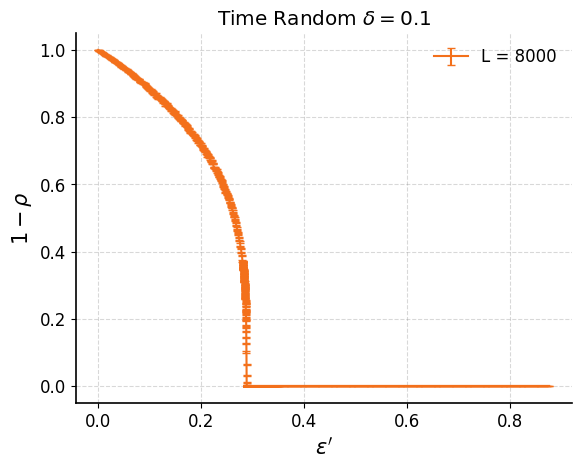

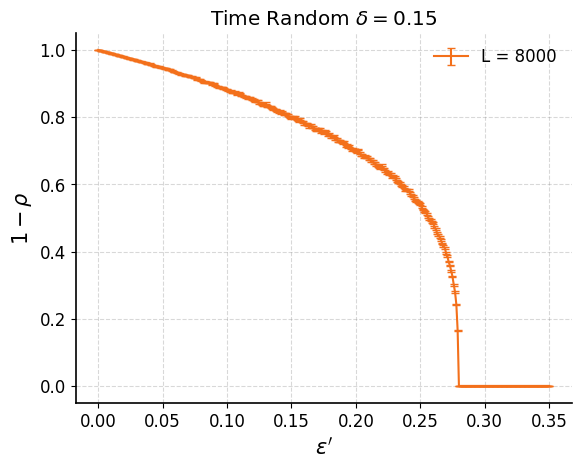

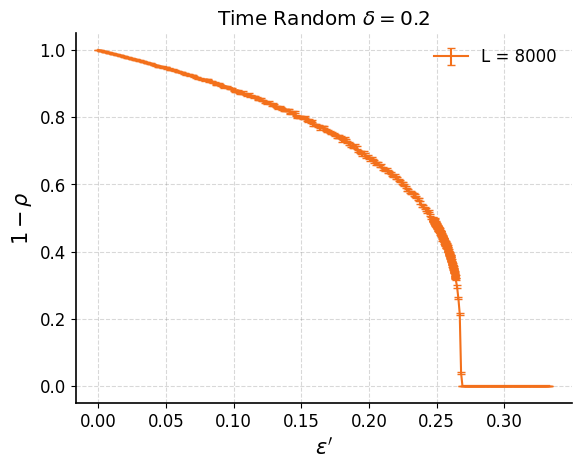

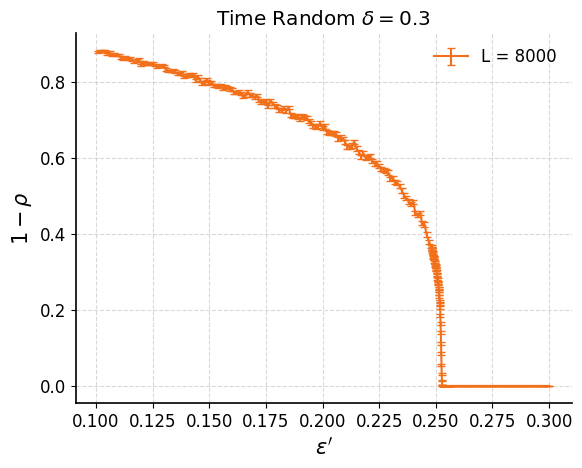

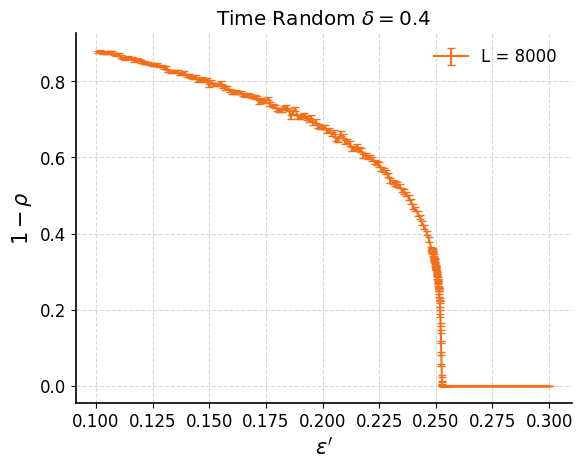

In [73]:
for delta_val in delta_vals:
    delta_val_name = f"{delta_val}".replace(".", "p")
    for i, L in enumerate(L_vals):
        c = cmap(i+3)
        epsilon_vals = sorted(list(avrage_rho_per_ep[L][delta_val].keys()))
        plt.errorbar(
            epsilon_vals, 
            [1-avrage_rho_per_ep[L][delta_val][epsilon_val] for epsilon_val in epsilon_vals], 
            yerr=[sem_rho_per_ep[L][delta_val][epsilon_val] for epsilon_val in epsilon_vals],
            label = f"L = {L}",
            # fmt='--',  
            # markersize=3,
            capsize=3,
            c=c
            )
        
    # plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
    plt.title(fr"Time Random $\delta = {delta_val}$")
    plt.xlabel(r"$\epsilon'$")
    plt.ylabel(r"$1 - \rho$")
    plt.legend()


    plt.savefig(f"figs/timerandom_{delta_val_name}.png")
    plt.show()


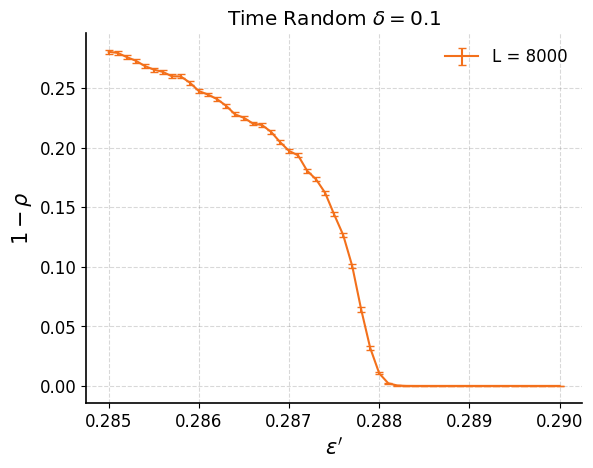

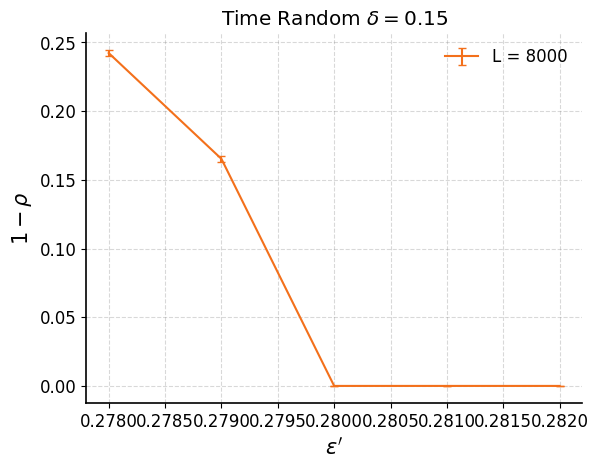

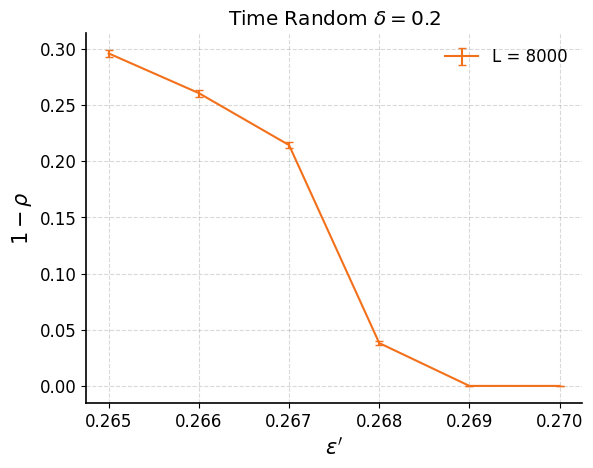

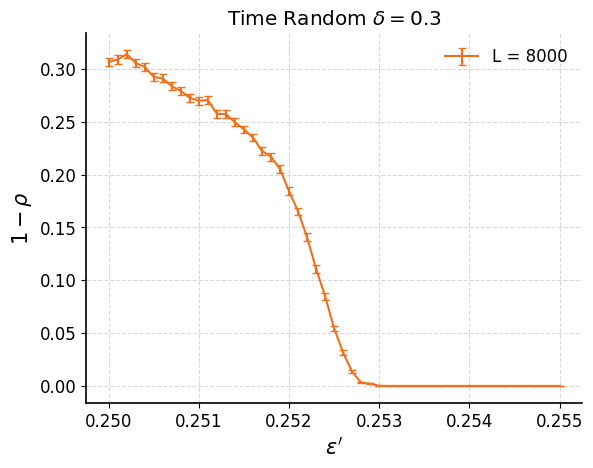

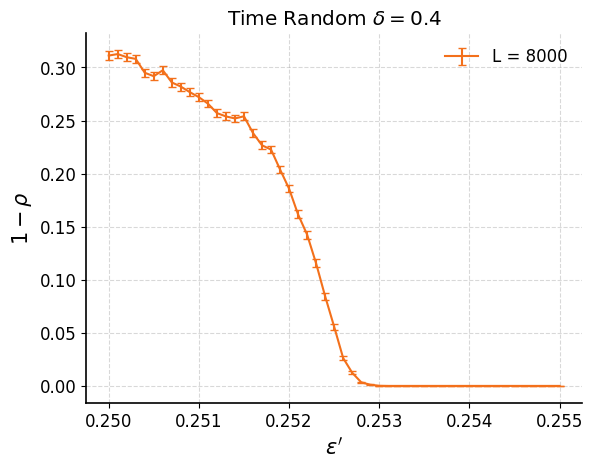

In [76]:
trans_windows = {
                0.1: (0.285, 0.29),
                0.15: (0.2775, 0.2825),
                0.2: (0.265, 0.27),
                0.3: (0.25, 0.255),
                 0.4: (0.25, 0.255)}

for delta_val in delta_vals:
    delta_val_name = f"{delta_val}".replace(".", "p")
    for i, L in enumerate(L_vals):
        c = cmap(i+3)
        trans_epsilon_vals = sorted([epsilon for epsilon in avrage_rho_per_ep[L][delta_val].keys() if trans_windows[delta_val][0] <= epsilon <= trans_windows[delta_val][1]])
        plt.errorbar(
            trans_epsilon_vals, 
            [1-avrage_rho_per_ep[L][delta_val][epsilon_val] for epsilon_val in trans_epsilon_vals], 
            yerr=[sem_rho_per_ep[L][delta_val][epsilon_val] for epsilon_val in trans_epsilon_vals],
            label = f"L = {L}",
            # fmt='--',  
            # markersize=3,
            capsize=3,
            c=c
            )
        
    # plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
    plt.title(fr"Time Random $\delta = {delta_val}$")
    plt.xlabel(r"$\epsilon'$")
    plt.ylabel(r"$1 - \rho$")
    plt.legend()


    plt.savefig(f"figs/timerandom_zoomed_delta{delta_val_name}.png")
    plt.show()
